# Numpy examples 

In [1]:
import numpy as np

## Speed of numpy arrays vs regular loops

    %timeit 
can be used to see how fast a process is 

    %%timeit
to time a whole cell

In [2]:
array1 = np.linspace(0, 100, 101 )
array2 = np.linspace(100, 300, 101)

In [4]:
%timeit ans1 = array2 - array1

433 ns ± 15.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
%timeit ans2 = [elem2 - elem1 for elem2, elem1 in zip(array2, array1)]

27 µs ± 347 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Broadcasting

How does numpy perform an operation between arrays of different size?

Simplest example: array * scalar

In [6]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0

c = a*b

print(c)

[2. 4. 6.]


Broadcasting is possible if the two arrays have a compatible dimension.   
We start comparing from the final dimension:   
-- is the size of the final dimension in each array the same?   
-- or is one of them 1?



In [7]:
## Incompatible

a = np.array([1.0, 2.0, 3.0])
b = np.array([4.0, 5.0])
c = a*b
print(c)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

If we reshape b, the multiplication is possible because the last dimension of b is 1.   
(Can do a similar reshape using the np.newaxis tool b = b[:, np.newaxis] )

In [8]:
## Compatible:
b=b.reshape(2,1)
print(b)

c=a*b
print(c)


[[4.]
 [5.]]
[[ 4.  8. 12.]
 [ 5. 10. 15.]]


This result is similar to an outer product.   
a      (1 x 3 array)  
b      (2 x 1 array)  
c      (2 x 3 array)

e.g. we form a 2 dimensional array, where every element is a product of one element from a, and one element from b

Broadcasting can be a useful way to use numpy array tools to vectorise a calculation.  
Suppose we wanted to compute  
$$\sum_{i \le N_A \\ j \le N_B}  a_i b_j$$
where $N_A$ and $N_B$ are the dimensions of $a$ and $b$.

We could use the standard loops:

In [9]:
a = np.linspace(0, 10, 1001 )
b = np.linspace(10, 30, 2001)

In [10]:
%%timeit
ab=0

for i in a:
    for j in b:
        ab+= i*j
        
print(ab)

200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
678 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


or we could use broadcasting of arrays, and the .sum() method

In [11]:
%%timeit

ab = (a[:, np.newaxis] * b).sum()
        
print(ab)

200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00000006
200300100.00

<br>

## Polynomials

Numpy has a wide range of tools for dealing with polynomials in the module np.polynomial

These treat the polynomials as arrays of coefficients

First import the polynomial class: from numpy.polynomial import Polynomial

(or, since we have already imported all of numpy above...)

In [14]:
Polynomial = np.polynomial.Polynomial

The polynomial $p(x) = 3x^2 - 8x + 9$ is defined

In [15]:
p = Polynomial([9, -8, 3])    # note the increasing powers...

# to evaluate at a value or range of values...
print(p(0))

x=np.linspace(0, 5, 6)
print(p(x))

9.0
[ 9.  4.  5. 12. 25. 44.]


Can use standard operators

In [16]:
q = Polynomial ([-1, 2])       #q = 2x -1
r = p*q
print(r)

poly([ -9.  26. -19.   6.])


And find roots:

In [17]:
r.roots()  

array([0.5       +0.j       , 1.33333333-1.1055416j,
       1.33333333+1.1055416j])

and derivatives

In [18]:
print(p.deriv())

#second derivative
print(p.deriv(2))

poly([-8.  6.])
poly([6.])


and perform simple fitting operations, e.g. to the function $g(x) = e^{- \sin(x)}$ in the range $0\le x \le 10$ up to 8th order

poly([ 4.96131241e-01  7.12507632e+00  9.74780781e+01  3.16567189e+02
 -2.57458415e+03 -2.71304780e+04  3.93098117e+04  5.84415971e+05
 -4.35288490e+05 -6.41246085e+06  3.38148365e+06  4.29516455e+07
 -1.80224920e+07 -1.90536947e+08  6.67515621e+07  5.84685519e+08
 -1.75138262e+08 -1.26996409e+09  3.29773564e+08  1.96843888e+09
 -4.47019204e+08 -2.16446915e+09  4.32359528e+08  1.64988991e+09
 -2.90976769e+08 -8.29221737e+08  1.29402755e+08  2.47190035e+08
 -3.41671674e+07 -3.31092195e+07  4.05345865e+06])


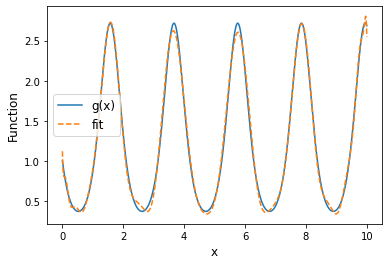

In [38]:
x=np.linspace(0, 10, 1001)
g = lambda x: np.exp(-np.sin(x*3))                   ##see lecture notes for lambda functions!
pf = Polynomial.fit(x, g(x) , 30)
print(pf)

#plot function and fit  (using matplotlib -- next lecture!)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(x, g(x), label='g(x)')
plt.plot(x, pf(x), '--', label='fit')
ax.set_ylabel("Function", fontsize=12)
ax.set_xlabel("x", fontsize=12)
ax.legend(fontsize=12)
plt.show()



<br>
<br>

## Random numbers
numpy has a number of routines to generate pseudorandom numbers according to different definitions.   
We will generally use these in place of the core python generators.

Generally, these generators are seeded by a number which depends on the time and operating system, but if we want to generate the same set of numbers repeatedly, we can seed the generator manually
e.g. np.random.seed(27)



In [43]:
# generate a random number from the uniform distribution over [0,1)
print(np.random.rand(), "\n")

# or an array
print(np.random.rand(2,3), "\n")

# or an integer within a certain range
print(np.random.randint(1,10), "\n")

# or more than one
print("Ten random numbers:", np.random.randint(1,10,10), "\t(with repetition!)\n")

0.11019582167957775 

[[0.11786469 0.7627331  0.58574944]
 [0.95010526 0.02384832 0.43427892]] 

6 

Ten random numbers: [1 1 3 8 7 7 9 2 7 5] 	(with repetition!)



For a random selection or permutation, or to shuffle:

In [45]:
# pick one or more (with or without replacement) from an array of values
print(np.random.choice(np.linspace(0.1, 1.0, 10), 5, replace=False), "\n")

#np.random.shuffle rearranges the elements in place, np.random.permutation creates a copy

starting_array=np.arange(1, 10)

new_array=np.random.permutation(starting_array)
print(starting_array, new_array, sep="\n")
print('\n')
np.random.shuffle(starting_array)
print(starting_array)

[0.7 0.5 0.9 1.  0.8] 

[1 2 3 4 5 6 7 8 9]
[2 1 9 7 3 6 4 5 8]


[1 7 9 4 2 5 3 8 6]


numpy.random also has a range of functions for generating random numbers from non-uniform distributions   
(e.g. np.random.normal(), np.random.poisson(), ...etc.

<br>
<br>

## Linear algebra
We will only consider operations with standard NumPy arrays, although a np.matrix object can also be used for many applications.   
We already showed basic matrix operations (multiplication, inversion, transpose) in the numpy_basics notebook

The following functions are similarly intuitive:       
np.eye(dim) returns a unit matrix    
np.inner/outer(a,b) returns the inner or outer product of two matrices   
np.linalg.matrix_power(A, 3) returns the matrix $A^3$ (A\*\*3 performs elementwise exponentiation)    
np.linalg.norm(/det/trace/rank) return other various matrix properties    
np.linalg.multidot (A, B, C, D, ...)  efficiently calculates products of multiple arrays / matrices


In [46]:
# To get the eigenvalues and eigenvectors of a matrix:

matrixA = np.array(((1.0,2.4,3.1), (0.5, 2.1, 9.8), (0.2, 1.1, 0.4)))
vals, vecs = np.linalg.eig(matrixA)

print('Eigenvalues:\n', vals, "\n")

print('Eigenvectors:\n', vecs, "\n")

Eigenvalues:
 [ 5.10895233  0.49441611 -2.10336844] 

Eigenvectors:
 [[-0.60453801 -0.98334883  0.31868602]
 [-0.76962371  0.18055792 -0.87689473]
 [-0.20545837  0.02058914  0.35985394]] 



In [47]:
# To solve a system of linear equations 

# i.e. solve 3x -2y =8  ;    -2x +3y -z = -20;      4x +17y +3z = 7

# rewrite as a matrix equation M x =b , where the vector x contains the unknowns (x,y,z)

M=np.array([[3, -2, 0], [-2, 3, -1], [4, 17, 3]])
b=np.array([8, -20, 7])             
x=np.linalg.solve(M, b)
print(x)


[ 1.37837838 -1.93243243 11.44594595]


Now try the circuit exercise in the notes.

In [48]:
M

array([[ 3, -2,  0],
       [-2,  3, -1],
       [ 4, 17,  3]])